<a href="https://colab.research.google.com/github/wcrowley342/tvratings/blob/main/IMDB_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

defining 'outliers' (An outlier is a value that deviates significantly from the other values in the dataset) amongst TV shows to answer the question of the 'best' and 'worst' episodes of a show.


helpful videos on uploading files from local machine to colab

https://www.youtube.com/watch?v=ZQ0PIqcK2_w

https://www.youtube.com/watch?v=6HFlwqK3oeo

https://www.youtube.com/watch?v=woHxvbBLarQ&t=119s


other interesting/relevant articles

https://medium.com/analytics-vidhya/data-analysis-end-to-end-imdb-dataset-2b6d9976ebc2

https://medium.com/analytics-vidhya/exploratory-data-analysis-imdb-dataset-cff0c3991ad5

https://towardsdatascience.com/imdb-tv-show-data-analysis-4961ef39d174

https://towardsdatascience.com/lets-calculate-z-scores-for-airbnb-prices-in-new-york-8da9964c49b0

# IMPORT DATA


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

**IMPORT RATINGS FILE**

In [6]:
from google.colab import files

upload_file = files.upload()

Saving title.ratings.tsv.gz to title.ratings.tsv.gz


In [8]:
#read in and show first 5 rows of data
import io
ratings = pd.read_csv('title.ratings.tsv.gz')
ratings.head()

,tconst\taverageRating\tnumVotes
0,tt0000001\t5.7\t1976
1,tt0000002\t5.8\t264
2,tt0000003\t6.5\t1824
3,tt0000004\t5.6\t178
4,tt0000005\t6.2\t2617


In [9]:
#Convert TSV to CSV with pandas

tsv_file = 'title.ratings.tsv.gz'

#reading given tsv file
csv_ratings=pd.read_table(tsv_file,sep='\t')

#converting TSV to csv
csv_ratings.to_csv('title.ratings.tsv.gz',index=False)

#output
print("new csv ratings file")

new csv ratings file


In [10]:
csv_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1976
1,tt0000002,5.8,264
2,tt0000003,6.5,1824
3,tt0000004,5.6,178
4,tt0000005,6.2,2617


In [11]:
csv_ratings.describe()

,averageRating,numVotes
count,1.315892e+06,1.315892e+06
mean,6.949959e+00,1.037721e+03
std,1.384290e+00,1.743564e+04
min,1.000000e+00,5.000000e+00
25%,6.200000e+00,1.100000e+01
50%,7.100000e+00,2.600000e+01
75%,7.900000e+00,1.010000e+02
max,1.000000e+01,2.743327e+06


**IMPORT EPISODE FILE**

In [12]:
from google.colab import files

upload_file = files.upload()

Saving title.episode.tsv.gz to title.episode.tsv.gz


In [13]:
import io

episodes = pd.read_csv('title.episode.tsv.gz')

episodes.head()

,tconst\tparentTconst\tseasonNumber\tepisodeNumber
0,tt0041951\ttt0041038\t1\t9
1,tt0042816\ttt0989125\t1\t17
2,tt0042889\ttt0989125\t\N\t\N
3,tt0043426\ttt0040051\t3\t42
4,tt0043631\ttt0989125\t2\t16


In [14]:
#Convert TSV to CSV with pandas

tsv_file = 'title.episode.tsv.gz'

#reading given tsv file
csv_episodes=pd.read_table(tsv_file,sep='\t')

#converting TSV to csv
csv_episodes.to_csv('title.episode.tsv.gz',index=False)

#output
print("new csv episodes file")

new csv episodes file


In [15]:
csv_episodes.head()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,\N,\N
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16


**IMPORT BASIC FILE**

In [18]:
from google.colab import files

upload_file = files.upload()

Saving title.basics.tsv.gz to title.basics.tsv.gz


In [19]:
import io
basics = pd.read_csv('title.basics.tsv.gz')

ParserError: ignored

In [20]:
#Convert TSV to CSV with pandas

tsv_file = 'title.basics.tsv.gz'

#reading given tsv file
csv_basics=pd.read_table(tsv_file,sep='\t')

#converting TSV to csv
csv_basics.to_csv('title.basics.tsv.gz',index=False)

#output
print("new csv basics file")

<ipython-input-20-f284b1ae0b78>:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  csv_basics=pd.read_table(tsv_file,sep='\t')


new csv basics file


In [21]:
csv_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


# CLEAN + COMBINE DATA



In [22]:
tvseries = csv_basics[(csv_basics['titleType']=='tvMiniSeries') | (csv_basics['titleType']=='tvSeries')]
basics_episodes = csv_basics[csv_basics['titleType']=='tvEpisode']
tvseries_ratings = pd.merge(tvseries, csv_ratings, on ="tconst")
episodes_ratings = pd.merge(csv_episodes, csv_ratings, on ="tconst")
tvseries_episodes_ratings = pd.merge(tvseries_ratings, episodes_ratings, left_on='tconst', right_on='parentTconst')

X refers to show,
y refers to episode

In [23]:
tvseries_episodes_ratings.head(20)

,tconst_x,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating_x,numVotes_x,tconst_y,parentTconst,seasonNumber,episodeNumber,averageRating_y,numVotes_y
0,tt0039123,tvSeries,Kraft Theatre,Kraft Television Theatre,0,1947,1958,60,Drama,8.1,201,tt0622201,tt0039123,7,11,6.7,89
1,tt0039123,tvSeries,Kraft Theatre,Kraft Television Theatre,0,1947,1958,60,Drama,8.1,201,tt0622204,tt0039123,9,26,8.2,36
2,tt0039123,tvSeries,Kraft Theatre,Kraft Television Theatre,0,1947,1958,60,Drama,8.1,201,tt0622205,tt0039123,9,31,7.8,15
3,tt0039123,tvSeries,Kraft Theatre,Kraft Television Theatre,0,1947,1958,60,Drama,8.1,201,tt0622223,tt0039123,7,36,5.1,22
4,tt0039123,tvSeries,Kraft Theatre,Kraft Television Theatre,0,1947,1958,60,Drama,8.1,201,tt0622279,tt0039123,11,22,9.0,23
5,tt0039123,tvSeries,Kraft Theatre,Kraft Television Theatre,0,1947,1958,60,Drama,8.1,201,tt0622348,tt0039123,7,7,6.7,18
6,tt0039123,tvSeries,Kraft Theatre,Kraft Television Theatre,0,1947,1958,60,Drama,8.1,201,tt0622424,tt0039123,8,16,7.8,131
7,tt0039123,tvSeries,Kraft Theatre,Kraft Television Theatre,0,1947,1958,60,Drama,8.1,201,tt0622425,tt0039123,8,20,8.6,56
8,tt0039123,tvSeries,Kraft Theatre,Kraft Television Theatre,0,1947,1958,60,Drama,8.1,201,tt0622573,tt0039123,11,40,8.3,12
9,tt0039123,tvSeries,Kraft Theatre,Kraft Television Theatre,0,1947,1958,60,Drama,8.1,201,tt0622660,tt0039123,11,27,6.4,40


In [24]:
#convert start and end year to integer data types

tvseries_episodes_ratings['startYear'] = pd.to_numeric(tvseries_episodes_ratings['startYear'], errors='coerce').astype(pd.Int64Dtype())
tvseries_episodes_ratings['endYear'] = pd.to_numeric(tvseries_episodes_ratings['endYear'], errors='coerce').astype(pd.Int64Dtype())


In [25]:
tvseries_episodes_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642953 entries, 0 to 642952
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst_x         642953 non-null  object 
 1   titleType        642953 non-null  object 
 2   primaryTitle     642953 non-null  object 
 3   originalTitle    642953 non-null  object 
 4   isAdult          642953 non-null  object 
 5   startYear        642931 non-null  Int64  
 6   endYear          405646 non-null  Int64  
 7   runtimeMinutes   642953 non-null  object 
 8   genres           642953 non-null  object 
 9   averageRating_x  642953 non-null  float64
 10  numVotes_x       642953 non-null  int64  
 11  tconst_y         642953 non-null  object 
 12  parentTconst     642953 non-null  object 
 13  seasonNumber     642953 non-null  object 
 14  episodeNumber    642953 non-null  object 
 15  averageRating_y  642953 non-null  float64
 16  numVotes_y       642953 non-null  int6

In [27]:
#see if we have any empty/missing rows

count_nan = tvseries_episodes_ratings['averageRating_y'].isnull().sum()
print(count_nan)

0


In [33]:
#filter out shows before 1973 or ones with very low # of ratings
numvotescondition = tvseries_episodes_ratings['numVotes_x'] > 1000
numvotescondition2 = tvseries_episodes_ratings['numVotes_y'] > 100
startYearcondition = tvseries_episodes_ratings['startYear'] > 1973
#create conditions for 'seasons' that would look at number of total seasons/epiosdes...

filtered_tvseries_episodes_ratings = tvseries_episodes_ratings[startYearcondition & numvotescondition & numvotescondition2]

#get rid of shows that only lasted 1 year
filtered_tvseries_episodes_ratings = filtered_tvseries_episodes_ratings[filtered_tvseries_episodes_ratings['startYear'] != filtered_tvseries_episodes_ratings['endYear']]

filtered_tvseries_episodes_ratings.head(20)

,tconst_x,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating_x,numVotes_x,tconst_y,parentTconst,seasonNumber,episodeNumber,averageRating_y,numVotes_y
45025,tt0070981,tvSeries,Derrick,Derrick,0,1974,1998,60,"Crime,Drama",6.6,1724,tt0558310,tt0070981,1,2,7.1,113
45048,tt0070981,tvSeries,Derrick,Derrick,0,1974,1998,60,"Crime,Drama",6.6,1724,tt0558333,tt0070981,2,4,8.1,117
45095,tt0070981,tvSeries,Derrick,Derrick,0,1974,1998,60,"Crime,Drama",6.6,1724,tt0558380,tt0070981,1,3,7.8,113
45100,tt0070981,tvSeries,Derrick,Derrick,0,1974,1998,60,"Crime,Drama",6.6,1724,tt0558385,tt0070981,2,2,8.1,101
45123,tt0070981,tvSeries,Derrick,Derrick,0,1974,1998,60,"Crime,Drama",6.6,1724,tt0558409,tt0070981,1,1,7.7,142
45184,tt0070991,tvSeries,Good Times,Good Times,0,1974,1979,30,Comedy,7.4,7641,tt0590834,tt0070991,1,2,7.7,137
45207,tt0070991,tvSeries,Good Times,Good Times,0,1974,1979,30,Comedy,7.4,7641,tt0590857,tt0070991,1,1,7.8,132
45208,tt0070991,tvSeries,Good Times,Good Times,0,1974,1979,30,Comedy,7.4,7641,tt0590858,tt0070991,1,4,7.5,110
45261,tt0070991,tvSeries,Good Times,Good Times,0,1974,1979,30,Comedy,7.4,7641,tt0590911,tt0070991,5,1,8.7,114
45269,tt0070991,tvSeries,Good Times,Good Times,0,1974,1979,30,Comedy,7.4,7641,tt0590919,tt0070991,2,9,8.1,106


In [34]:
filtered_tvseries_episodes_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84822 entries, 45025 to 642792
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst_x         84822 non-null  object 
 1   titleType        84822 non-null  object 
 2   primaryTitle     84822 non-null  object 
 3   originalTitle    84822 non-null  object 
 4   isAdult          84822 non-null  object 
 5   startYear        84822 non-null  Int64  
 6   endYear          84822 non-null  Int64  
 7   runtimeMinutes   84822 non-null  object 
 8   genres           84822 non-null  object 
 9   averageRating_x  84822 non-null  float64
 10  numVotes_x       84822 non-null  int64  
 11  tconst_y         84822 non-null  object 
 12  parentTconst     84822 non-null  object 
 13  seasonNumber     84822 non-null  object 
 14  episodeNumber    84822 non-null  object 
 15  averageRating_y  84822 non-null  float64
 16  numVotes_y       84822 non-null  int64  
dtypes: Int6

In [40]:
#calculate standard dev of ratings of show and the z score of the episodes

filtered_tvseries_episodes_ratings['standardDeviation_x'] = filtered_tvseries_episodes_ratings.groupby('primaryTitle')['averageRating_y'].transform('std')

filtered_tvseries_episodes_ratings['Z-score'] = (filtered_tvseries_episodes_ratings['averageRating_y'] - filtered_tvseries_episodes_ratings['averageRating_x']) / filtered_tvseries_episodes_ratings['standardDeviation_x']

filtered_tvseries_episodes_ratings.head(20)

,tconst_x,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating_x,numVotes_x,tconst_y,parentTconst,seasonNumber,episodeNumber,averageRating_y,numVotes_y,standardDeviation_x,Z-score
45025,tt0070981,tvSeries,Derrick,Derrick,0,1974,1998,60,"Crime,Drama",6.6,1724,tt0558310,tt0070981,1,2,7.1,113,0.409878,1.219875
45048,tt0070981,tvSeries,Derrick,Derrick,0,1974,1998,60,"Crime,Drama",6.6,1724,tt0558333,tt0070981,2,4,8.1,117,0.409878,3.659625
45095,tt0070981,tvSeries,Derrick,Derrick,0,1974,1998,60,"Crime,Drama",6.6,1724,tt0558380,tt0070981,1,3,7.8,113,0.409878,2.927700
45100,tt0070981,tvSeries,Derrick,Derrick,0,1974,1998,60,"Crime,Drama",6.6,1724,tt0558385,tt0070981,2,2,8.1,101,0.409878,3.659625
45123,tt0070981,tvSeries,Derrick,Derrick,0,1974,1998,60,"Crime,Drama",6.6,1724,tt0558409,tt0070981,1,1,7.7,142,0.409878,2.683725
45184,tt0070991,tvSeries,Good Times,Good Times,0,1974,1979,30,Comedy,7.4,7641,tt0590834,tt0070991,1,2,7.7,137,0.411154,0.729654
45207,tt0070991,tvSeries,Good Times,Good Times,0,1974,1979,30,Comedy,7.4,7641,tt0590857,tt0070991,1,1,7.8,132,0.411154,0.972871
45208,tt0070991,tvSeries,Good Times,Good Times,0,1974,1979,30,Comedy,7.4,7641,tt0590858,tt0070991,1,4,7.5,110,0.411154,0.243218
45261,tt0070991,tvSeries,Good Times,Good Times,0,1974,1979,30,Comedy,7.4,7641,tt0590911,tt0070991,5,1,8.7,114,0.411154,3.161832
45269,tt0070991,tvSeries,Good Times,Good Times,0,1974,1979,30,Comedy,7.4,7641,tt0590919,tt0070991,2,9,8.1,106,0.411154,1.702525


In [95]:
filtered_tvseries_episodes_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84822 entries, 45025 to 642792
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tconst_x             84822 non-null  object 
 1   titleType            84822 non-null  object 
 2   primaryTitle         84822 non-null  object 
 3   originalTitle        84822 non-null  object 
 4   isAdult              84822 non-null  object 
 5   startYear            84822 non-null  Int64  
 6   endYear              84822 non-null  Int64  
 7   runtimeMinutes       84822 non-null  object 
 8   genres               84822 non-null  object 
 9   averageRating_x      84822 non-null  float64
 10  numVotes_x           84822 non-null  int64  
 11  tconst_y             84822 non-null  object 
 12  parentTconst         84822 non-null  object 
 13  seasonNumber         84822 non-null  object 
 14  episodeNumber        84822 non-null  object 
 15  averageRating_y      84822 non-

**GET BEST/WORST EPISODES ATTEMPT #1**

In [92]:
best_worst_episodes = filtered_tvseries_episodes_ratings.groupby('primaryTitle')['Z-score'].agg(['min','max']).reset_index()

In [93]:
best_worst_episodes.head(20)

,primaryTitle,min,max
0,$#*! My Dad Says,-0.378215,2.017145
1,'Allo 'Allo!,-3.856170,1.156851
2,'Til Death,0.612372,3.980421
3,10 Things I Hate About You,NaN,NaN
4,12 Monkeys,-0.197630,3.754974
5,13 Geboden,0.774597,3.098387
6,13 Reasons Why,-2.492299,1.765378
7,1600 Penn,NaN,NaN
8,1883,-2.247448,1.021567
9,19 Kids and Counting,NaN,NaN


In [94]:
best_worst_episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2378 entries, 0 to 2377
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   primaryTitle  2378 non-null   object 
 1   min           2091 non-null   float64
 2   max           2091 non-null   float64
dtypes: float64(2), object(1)
memory usage: 55.9+ KB


In [96]:
worst_episodes_z_scores = best_worst_episodes.iloc[:, :2]
worst_episodes_z_scores = worst_episodes_z_scores.rename(columns={'min': 'Z-score'})
worst_episodes_z_scores['worst_episode'] = 'worst episode'
print(worst_episodes_z_scores)

                    primaryTitle   Z-score  worst_episode
0               $#*! My Dad Says -0.378215  worst episode
1                   'Allo 'Allo! -3.856170  worst episode
2                     'Til Death  0.612372  worst episode
3     10 Things I Hate About You       NaN  worst episode
4                     12 Monkeys -0.197630  worst episode
...                          ...       ...            ...
2373                         Zoo -2.088163  worst episode
2374                      iCarly -3.821522  worst episode
2375                     iZombie -1.285317  worst episode
2376              Äkta människor -5.597965  worst episode
2377                    Æon Flux -2.036399  worst episode

[2378 rows x 3 columns]


In [97]:
worst_episodes_df = pd.merge(filtered_tvseries_episodes_ratings, worst_episodes_z_scores, on=['primaryTitle','Z-score'], how='inner')
worst_episodes_df.head()

,tconst_x,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating_x,numVotes_x,tconst_y,parentTconst,seasonNumber,episodeNumber,averageRating_y,numVotes_y,standardDeviation_x,Z-score,worst_episode
0,tt0070981,tvSeries,Derrick,Derrick,0,1974,1998,60,"Crime,Drama",6.6,1724,tt0558310,tt0070981,1,2,7.1,113,0.409878,1.219875,worst episode
1,tt0070991,tvSeries,Good Times,Good Times,0,1974,1979,30,Comedy,7.4,7641,tt0590858,tt0070991,1,4,7.5,110,0.411154,0.243218,worst episode
2,tt0070992,tvSeries,Happy Days,Happy Days,0,1974,1984,30,"Comedy,Family,Music",7.4,19881,tt0596233,tt0070992,5,1,6.4,116,0.427586,-2.338712,worst episode
3,tt0071003,tvSeries,Kolchak: The Night Stalker,Kolchak: The Night Stalker,0,1974,1975,51,"Horror,Mystery,Thriller",8.4,5694,tt0621552,tt0071003,1,3,7.1,541,0.316228,-4.110961,worst episode
4,tt0071007,tvSeries,Little House on the Prairie,Little House on the Prairie,0,1974,1983,60,"Drama,Family,Romance",7.5,24830,tt0633092,tt0071007,6,7,4.8,319,0.560766,-4.814842,worst episode


In [98]:
#filter/narrow down by worst episodes with most votes
# Find the indices of episodes with the highest ratings for each TV show
max_rating_indices = worst_episodes_df.groupby('primaryTitle')['numVotes_y'].idxmax()
# Subset the DataFrame to include only the episodes with the highest ratings
subset_worst_episodes_df = worst_episodes_df.loc[max_rating_indices]
subset_worst_episodes_df.head(20)

,tconst_x,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating_x,numVotes_x,tconst_y,parentTconst,seasonNumber,episodeNumber,averageRating_y,numVotes_y,standardDeviation_x,Z-score,worst_episode
1458,tt1612578,tvSeries,$#*! My Dad Says,$#*! My Dad Says,0,2010,2011,30,Comedy,6.2,5240,tt1685053,tt1612578,1,1,5.9,166,0.793200,-0.378215,worst episode
123,tt0086659,tvSeries,'Allo 'Allo!,'Allo 'Allo!,0,1982,1992,45,"Comedy,History,War",8.4,26106,tt0500314,tt0086659,7,1,7.4,166,0.259325,-3.856170,worst episode
908,tt0759475,tvSeries,'Til Death,'Til Death,0,2006,2010,21,"Comedy,Romance",6.5,6473,tt1609173,tt0759475,4,20,6.7,153,0.326599,0.612372,worst episode
1254,tt1321805,tvSeries,10 Things I Hate About You,10 Things I Hate About You,0,2009,2010,30,Comedy,7.2,6199,tt1450774,tt1321805,1,1,6.5,135,NaN,NaN,worst episode
1998,tt3148266,tvSeries,12 Monkeys,12 Monkeys,0,2015,2018,42,"Adventure,Drama,Mystery",7.7,46477,tt4135904,tt3148266,1,3,7.6,1488,0.505996,-0.197630,worst episode
2460,tt5203748,tvSeries,13 Geboden,13 Geboden,0,2017,2018,46,"Crime,Mystery,Thriller",7.0,2847,tt6118748,tt5203748,1,1,7.1,141,0.129099,0.774597,worst episode
1598,tt1837492,tvSeries,13 Reasons Why,13 Reasons Why,0,2017,2020,60,"Drama,Mystery,Thriller",7.5,302234,tt11187066,tt1837492,4,4,5.1,1945,0.962966,-2.492299,worst episode
1773,tt2266639,tvSeries,1600 Penn,1600 Penn,0,2012,2013,22,Comedy,5.7,3929,tt2269106,tt2266639,1,1,5.4,118,NaN,NaN,worst episode
1300,tt13991232,tvMiniSeries,1883,1883,0,2021,2022,60,"Drama,Western",8.7,93413,tt15294874,tt13991232,1,8,7.6,2892,0.489444,-2.247448,worst episode
1249,tt1307083,tvSeries,19 Kids and Counting,17 Kids and Counting,0,2008,2015,30,"Documentary,Reality-TV",2.9,2548,tt1967432,tt1307083,7,4,2.7,300,NaN,NaN,worst episode


In [100]:
best_episodes_z_scores = best_worst_episodes.iloc[:, [0, 2]]

print(best_episodes_z_scores)

                    primaryTitle       max
0               $#*! My Dad Says  2.017145
1                   'Allo 'Allo!  1.156851
2                     'Til Death  3.980421
3     10 Things I Hate About You       NaN
4                     12 Monkeys  3.754974
...                          ...       ...
2373                         Zoo  3.132245
2374                      iCarly  4.585827
2375                     iZombie  3.341825
2376              Äkta människor -2.399128
2377                    Æon Flux  1.221839

[2378 rows x 2 columns]


In [101]:
best_episodes_z_scores = best_episodes_z_scores.rename(columns={'max': 'Z-score'})
best_episodes_z_scores['best episode'] = 'best episode'
print(best_episodes_z_scores)

                    primaryTitle   Z-score  best episode
0               $#*! My Dad Says  2.017145  best episode
1                   'Allo 'Allo!  1.156851  best episode
2                     'Til Death  3.980421  best episode
3     10 Things I Hate About You       NaN  best episode
4                     12 Monkeys  3.754974  best episode
...                          ...       ...           ...
2373                         Zoo  3.132245  best episode
2374                      iCarly  4.585827  best episode
2375                     iZombie  3.341825  best episode
2376              Äkta människor -2.399128  best episode
2377                    Æon Flux  1.221839  best episode

[2378 rows x 3 columns]


In [102]:
best_episodes_df = pd.merge(filtered_tvseries_episodes_ratings, best_episodes_z_scores, on=['primaryTitle','Z-score'], how='inner')

In [103]:
best_episodes_df.head(20)

,tconst_x,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating_x,numVotes_x,tconst_y,parentTconst,seasonNumber,episodeNumber,averageRating_y,numVotes_y,standardDeviation_x,Z-score,best episode
0,tt0070981,tvSeries,Derrick,Derrick,0,1974,1998,60,"Crime,Drama",6.6,1724,tt0558333,tt0070981,2,4,8.1,117,0.409878,3.659625,best episode
1,tt0070981,tvSeries,Derrick,Derrick,0,1974,1998,60,"Crime,Drama",6.6,1724,tt0558385,tt0070981,2,2,8.1,101,0.409878,3.659625,best episode
2,tt0070991,tvSeries,Good Times,Good Times,0,1974,1979,30,Comedy,7.4,7641,tt0590911,tt0070991,5,1,8.7,114,0.411154,3.161832,best episode
3,tt0070992,tvSeries,Happy Days,Happy Days,0,1974,1984,30,"Comedy,Family,Music",7.4,19881,tt0596222,tt0070992,2,11,8.8,328,0.427586,3.274196,best episode
4,tt0071003,tvSeries,Kolchak: The Night Stalker,Kolchak: The Night Stalker,0,1974,1975,51,"Horror,Mystery,Thriller",8.4,5694,tt0621537,tt0071003,1,11,8.4,544,0.316228,0.000000,best episode
5,tt0071007,tvSeries,Little House on the Prairie,Little House on the Prairie,0,1974,1983,60,"Drama,Family,Romance",7.5,24830,tt0633030,tt0071007,4,22,8.7,363,0.560766,2.139930,best episode
6,tt0071007,tvSeries,Little House on the Prairie,Little House on the Prairie,0,1974,1983,60,"Drama,Family,Romance",7.5,24830,tt0633074,tt0071007,6,22,8.7,312,0.560766,2.139930,best episode
7,tt0071007,tvSeries,Little House on the Prairie,Little House on the Prairie,0,1974,1983,60,"Drama,Family,Romance",7.5,24830,tt0794908,tt0071007,2,1,8.7,402,0.560766,2.139930,best episode
8,tt0071036,tvSeries,Porridge,Porridge,0,1974,1977,45,"Comedy,Crime",8.3,6495,tt0676964,tt0071036,2,5,8.7,163,0.276444,1.446950,best episode
9,tt0071040,tvSeries,Rhoda,Rhoda,0,1974,1978,30,Comedy,6.8,2747,tt0685881,tt0071040,1,8,8.9,111,NaN,NaN,best episode


In [104]:
row = best_episodes_df[best_episodes_df['primaryTitle'] == '2 Broke Girls']
row.head()

,tconst_x,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating_x,numVotes_x,tconst_y,parentTconst,seasonNumber,episodeNumber,averageRating_y,numVotes_y,standardDeviation_x,Z-score,best episode
1570,tt1845307,tvSeries,2 Broke Girls,2 Broke Girls,0,2011,2017,22,Comedy,6.6,101122,tt2458908,tt1845307,2,6,7.9,1075,0.283097,4.592067,best episode


In [105]:
# Find the indices of episodes with the highest ratings for each TV show
max_rating_indices = best_episodes_df.groupby('primaryTitle')['numVotes_y'].idxmax()

# Subset the DataFrame to include only the episodes with the highest ratings
subset_best_episodes_df = best_episodes_df.loc[max_rating_indices]

# Display the subset DataFrame
subset_best_episodes_df.head(20)

,tconst_x,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating_x,numVotes_x,tconst_y,parentTconst,seasonNumber,episodeNumber,averageRating_y,numVotes_y,standardDeviation_x,Z-score,best episode
1418,tt1612578,tvSeries,$#*! My Dad Says,$#*! My Dad Says,0,2010,2011,30,Comedy,6.2,5240,tt1825213,tt1612578,1,18,7.8,120,0.793200,2.017145,best episode
117,tt0086659,tvSeries,'Allo 'Allo!,'Allo 'Allo!,0,1982,1992,45,"Comedy,History,War",8.4,26106,tt0500364,tt0086659,2,7,8.7,260,0.259325,1.156851,best episode
854,tt0759475,tvSeries,'Til Death,'Til Death,0,2006,2010,21,"Comedy,Romance",6.5,6473,tt1609498,tt0759475,4,19,7.8,143,0.326599,3.980421,best episode
1220,tt1321805,tvSeries,10 Things I Hate About You,10 Things I Hate About You,0,2009,2010,30,Comedy,7.2,6199,tt1450774,tt1321805,1,1,6.5,135,NaN,NaN,best episode
1948,tt3148266,tvSeries,12 Monkeys,12 Monkeys,0,2015,2018,42,"Adventure,Drama,Mystery",7.7,46477,tt8400858,tt3148266,4,11,9.6,1837,0.505996,3.754974,best episode
2377,tt5203748,tvSeries,13 Geboden,13 Geboden,0,2017,2018,46,"Crime,Mystery,Thriller",7.0,2847,tt6118766,tt5203748,1,4,7.4,102,0.129099,3.098387,best episode
1553,tt1837492,tvSeries,13 Reasons Why,13 Reasons Why,0,2017,2020,60,"Drama,Mystery,Thriller",7.5,302234,tt5174280,tt1837492,1,13,9.2,8672,0.962966,1.765378,best episode
1706,tt2266639,tvSeries,1600 Penn,1600 Penn,0,2012,2013,22,Comedy,5.7,3929,tt2269106,tt2266639,1,1,5.4,118,NaN,NaN,best episode
1262,tt13991232,tvMiniSeries,1883,1883,0,2021,2022,60,"Drama,Western",8.7,93413,tt15294872,tt13991232,1,9,9.2,3165,0.489444,1.021567,best episode
1214,tt1307083,tvSeries,19 Kids and Counting,17 Kids and Counting,0,2008,2015,30,"Documentary,Reality-TV",2.9,2548,tt1967432,tt1307083,7,4,2.7,300,NaN,NaN,best episode


In [106]:
merged_subsets = subset_best_episodes_df.append(subset_worst_episodes_df)

<ipython-input-106-723f76ad6cf7>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_subsets = subset_best_episodes_df.append(subset_worst_episodes_df)


In [107]:
merged_subsets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4756 entries, 1418 to 342
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tconst_x             4756 non-null   object 
 1   titleType            4756 non-null   object 
 2   primaryTitle         4756 non-null   object 
 3   originalTitle        4756 non-null   object 
 4   isAdult              4756 non-null   object 
 5   startYear            4756 non-null   Int64  
 6   endYear              4756 non-null   Int64  
 7   runtimeMinutes       4756 non-null   object 
 8   genres               4756 non-null   object 
 9   averageRating_x      4756 non-null   float64
 10  numVotes_x           4756 non-null   int64  
 11  tconst_y             4756 non-null   object 
 12  parentTconst         4756 non-null   object 
 13  seasonNumber         4756 non-null   object 
 14  episodeNumber        4756 non-null   object 
 15  averageRating_y      4756 non-null  

In [108]:
merged_subsets.head(20)

,tconst_x,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating_x,...,tconst_y,parentTconst,seasonNumber,episodeNumber,averageRating_y,numVotes_y,standardDeviation_x,Z-score,best episode,worst_episode
1418,tt1612578,tvSeries,$#*! My Dad Says,$#*! My Dad Says,0,2010,2011,30,Comedy,6.2,...,tt1825213,tt1612578,1,18,7.8,120,0.793200,2.017145,best episode,NaN
117,tt0086659,tvSeries,'Allo 'Allo!,'Allo 'Allo!,0,1982,1992,45,"Comedy,History,War",8.4,...,tt0500364,tt0086659,2,7,8.7,260,0.259325,1.156851,best episode,NaN
854,tt0759475,tvSeries,'Til Death,'Til Death,0,2006,2010,21,"Comedy,Romance",6.5,...,tt1609498,tt0759475,4,19,7.8,143,0.326599,3.980421,best episode,NaN
1220,tt1321805,tvSeries,10 Things I Hate About You,10 Things I Hate About You,0,2009,2010,30,Comedy,7.2,...,tt1450774,tt1321805,1,1,6.5,135,NaN,NaN,best episode,NaN
1948,tt3148266,tvSeries,12 Monkeys,12 Monkeys,0,2015,2018,42,"Adventure,Drama,Mystery",7.7,...,tt8400858,tt3148266,4,11,9.6,1837,0.505996,3.754974,best episode,NaN
2377,tt5203748,tvSeries,13 Geboden,13 Geboden,0,2017,2018,46,"Crime,Mystery,Thriller",7.0,...,tt6118766,tt5203748,1,4,7.4,102,0.129099,3.098387,best episode,NaN
1553,tt1837492,tvSeries,13 Reasons Why,13 Reasons Why,0,2017,2020,60,"Drama,Mystery,Thriller",7.5,...,tt5174280,tt1837492,1,13,9.2,8672,0.962966,1.765378,best episode,NaN
1706,tt2266639,tvSeries,1600 Penn,1600 Penn,0,2012,2013,22,Comedy,5.7,...,tt2269106,tt2266639,1,1,5.4,118,NaN,NaN,best episode,NaN
1262,tt13991232,tvMiniSeries,1883,1883,0,2021,2022,60,"Drama,Western",8.7,...,tt15294872,tt13991232,1,9,9.2,3165,0.489444,1.021567,best episode,NaN
1214,tt1307083,tvSeries,19 Kids and Counting,17 Kids and Counting,0,2008,2015,30,"Documentary,Reality-TV",2.9,...,tt1967432,tt1307083,7,4,2.7,300,NaN,NaN,best episode,NaN


In [110]:
merged_subsets.sort_values(by=['primaryTitle'])

,tconst_x,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating_x,...,tconst_y,parentTconst,seasonNumber,episodeNumber,averageRating_y,numVotes_y,standardDeviation_x,Z-score,best episode,worst_episode
1418,tt1612578,tvSeries,$#*! My Dad Says,$#*! My Dad Says,0,2010,2011,30,Comedy,6.2,...,tt1825213,tt1612578,1,18,7.8,120,0.793200,2.017145,best episode,NaN
1458,tt1612578,tvSeries,$#*! My Dad Says,$#*! My Dad Says,0,2010,2011,30,Comedy,6.2,...,tt1685053,tt1612578,1,1,5.9,166,0.793200,-0.378215,NaN,worst episode
123,tt0086659,tvSeries,'Allo 'Allo!,'Allo 'Allo!,0,1982,1992,45,"Comedy,History,War",8.4,...,tt0500314,tt0086659,7,1,7.4,166,0.259325,-3.856170,NaN,worst episode
117,tt0086659,tvSeries,'Allo 'Allo!,'Allo 'Allo!,0,1982,1992,45,"Comedy,History,War",8.4,...,tt0500364,tt0086659,2,7,8.7,260,0.259325,1.156851,best episode,NaN
854,tt0759475,tvSeries,'Til Death,'Til Death,0,2006,2010,21,"Comedy,Romance",6.5,...,tt1609498,tt0759475,4,19,7.8,143,0.326599,3.980421,best episode,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,tt3501584,tvSeries,iZombie,iZombie,0,2015,2019,42,"Comedy,Crime,Drama",7.8,...,tt5223550,tt3501584,2,19,9.1,1308,0.389009,3.341825,best episode,NaN
1724,tt2180271,tvSeries,Äkta människor,Äkta människor,0,2012,2014,60,"Drama,Sci-Fi,Thriller",7.9,...,tt2192987,tt2180271,1,3,7.2,147,0.125045,-5.597965,NaN,worst episode
1672,tt2180271,tvSeries,Äkta människor,Äkta människor,0,2012,2014,60,"Drama,Sci-Fi,Thriller",7.9,...,tt2192995,tt2180271,1,8,7.6,133,0.125045,-2.399128,best episode,NaN
346,tt0111873,tvSeries,Æon Flux,Æon Flux,0,1991,1995,30,"Adventure,Animation,Sci-Fi",7.8,...,tt0834467,tt0111873,3,4,8.1,132,0.245531,1.221839,best episode,NaN


In [111]:
merged_subsets['best_worst_episode'] = merged_subsets['best episode'].fillna(merged_subsets['worst_episode'])
merged_subsets.head()

,tconst_x,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating_x,...,parentTconst,seasonNumber,episodeNumber,averageRating_y,numVotes_y,standardDeviation_x,Z-score,best episode,worst_episode,best_worst_episode
1418,tt1612578,tvSeries,$#*! My Dad Says,$#*! My Dad Says,0,2010,2011,30,Comedy,6.2,...,tt1612578,1,18,7.8,120,0.793200,2.017145,best episode,NaN,best episode
117,tt0086659,tvSeries,'Allo 'Allo!,'Allo 'Allo!,0,1982,1992,45,"Comedy,History,War",8.4,...,tt0086659,2,7,8.7,260,0.259325,1.156851,best episode,NaN,best episode
854,tt0759475,tvSeries,'Til Death,'Til Death,0,2006,2010,21,"Comedy,Romance",6.5,...,tt0759475,4,19,7.8,143,0.326599,3.980421,best episode,NaN,best episode
1220,tt1321805,tvSeries,10 Things I Hate About You,10 Things I Hate About You,0,2009,2010,30,Comedy,7.2,...,tt1321805,1,1,6.5,135,NaN,NaN,best episode,NaN,best episode
1948,tt3148266,tvSeries,12 Monkeys,12 Monkeys,0,2015,2018,42,"Adventure,Drama,Mystery",7.7,...,tt3148266,4,11,9.6,1837,0.505996,3.754974,best episode,NaN,best episode


In [112]:
merged_subsets.sort_values(by=['primaryTitle'])

,tconst_x,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating_x,...,parentTconst,seasonNumber,episodeNumber,averageRating_y,numVotes_y,standardDeviation_x,Z-score,best episode,worst_episode,best_worst_episode
1418,tt1612578,tvSeries,$#*! My Dad Says,$#*! My Dad Says,0,2010,2011,30,Comedy,6.2,...,tt1612578,1,18,7.8,120,0.793200,2.017145,best episode,NaN,best episode
1458,tt1612578,tvSeries,$#*! My Dad Says,$#*! My Dad Says,0,2010,2011,30,Comedy,6.2,...,tt1612578,1,1,5.9,166,0.793200,-0.378215,NaN,worst episode,worst episode
123,tt0086659,tvSeries,'Allo 'Allo!,'Allo 'Allo!,0,1982,1992,45,"Comedy,History,War",8.4,...,tt0086659,7,1,7.4,166,0.259325,-3.856170,NaN,worst episode,worst episode
117,tt0086659,tvSeries,'Allo 'Allo!,'Allo 'Allo!,0,1982,1992,45,"Comedy,History,War",8.4,...,tt0086659,2,7,8.7,260,0.259325,1.156851,best episode,NaN,best episode
854,tt0759475,tvSeries,'Til Death,'Til Death,0,2006,2010,21,"Comedy,Romance",6.5,...,tt0759475,4,19,7.8,143,0.326599,3.980421,best episode,NaN,best episode
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,tt3501584,tvSeries,iZombie,iZombie,0,2015,2019,42,"Comedy,Crime,Drama",7.8,...,tt3501584,2,19,9.1,1308,0.389009,3.341825,best episode,NaN,best episode
1724,tt2180271,tvSeries,Äkta människor,Äkta människor,0,2012,2014,60,"Drama,Sci-Fi,Thriller",7.9,...,tt2180271,1,3,7.2,147,0.125045,-5.597965,NaN,worst episode,worst episode
1672,tt2180271,tvSeries,Äkta människor,Äkta människor,0,2012,2014,60,"Drama,Sci-Fi,Thriller",7.9,...,tt2180271,1,8,7.6,133,0.125045,-2.399128,best episode,NaN,best episode
346,tt0111873,tvSeries,Æon Flux,Æon Flux,0,1991,1995,30,"Adventure,Animation,Sci-Fi",7.8,...,tt0111873,3,4,8.1,132,0.245531,1.221839,best episode,NaN,best episode


In [113]:
#input show name at end of below code to test it out

TEST_trial = merged_subsets[merged_subsets['primaryTitle'] == 'Breaking Bad']

columns_to_drop = ['tconst_x', 'titleType', 'originalTitle', 'isAdult', 'runtimeMinutes', 'numVotes_x', 'parentTconst', 'standardDeviation_x', 'best episode', 'worst_episode']
TEST_trial.drop(columns_to_drop, axis=1, inplace=True)

TEST_trial.head()

<ipython-input-113-7868bb611f98>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TEST_trial.drop(columns_to_drop, axis=1, inplace=True)


,primaryTitle,startYear,endYear,genres,averageRating_x,tconst_y,seasonNumber,episodeNumber,averageRating_y,numVotes_y,Z-score,best_worst_episode
925,Breaking Bad,2008,2013,"Crime,Drama,Thriller",9.5,tt2301451,5,14,10.0,196632,0.919619,best episode
978,Breaking Bad,2008,2013,"Crime,Drama,Thriller",9.5,tt1615550,3,10,7.8,37694,-3.126705,worst episode


**get best/worst episodes attempt #2**

In [ ]:
# Assuming you have a DataFrame called 'df' with columns: 'Show', 'Episode', 'Z-score'

# Group by 'Show' column and find the index of the episodes with min and max Z-scores within each group
min_idx = filtered_tvseries_episodes_ratings.groupby('primaryTitle')['Z-score'].idxmin()
max_idx = filtered_tvseries_episodes_ratings.groupby('primaryTitle')['Z-score'].idxmax()

complete_min_idx = min_idx.dropna()
complete_max_idx = max_idx.dropna()

# Filter the original DataFrame based on the index to get the rows with min and max Z-scores
min_episodes = filtered_tvseries_episodes_ratings.loc[complete_min_idx]
max_episodes = filtered_tvseries_episodes_ratings.loc[complete_max_idx]

# Create a new DataFrame with the desired columns
result_df = pd.DataFrame({
    'TV Show': filtered_tvseries_episodes_ratings.loc[complete_min_idx, 'primaryTitle'],  # TV show name for min Z-score
    'Min Z-score Episode': filtered_tvseries_episodes_ratings.loc[complete_min_idx, 'tconst_y'],  # episode name for min Z-score
    'Min Z-score Z-Score': filtered_tvseries_episodes_ratings.loc[complete_min_idx, 'Z-score'],  # episode title for min Z-score (add more columns if needed)
    'Max Z-score Episode': filtered_tvseries_episodes_ratings.loc[complete_max_idx, 'tconst_y'],  # episode name for max Z-score
    'Max Z-score Z-Score': filtered_tvseries_episodes_ratings.loc[complete_max_idx, 'Z-score']  # episode title for max Z-score (add more columns if needed)
})
# Display the resulting table
print(result_df)

                       TV Show Min Z-score Episode  Min Z-score Z-Score  \
0                      Derrick           tt0558310             1.219875   
1                          NaN                 NaN                  NaN   
8                   Good Times           tt0590858             0.243218   
9                          NaN                 NaN                  NaN   
60                         NaN                 NaN                  NaN   
...                        ...                 ...                  ...   
124364                     NaN                 NaN                  NaN   
124381                     NaN                 NaN                  NaN   
124393  Motherland: Fort Salem          tt21375736             0.641933   
124395                     NaN                 NaN                  NaN   
124397              Blown Away          tt13839390            -2.047968   

       Max Z-score Episode  Max Z-score Z-Score  
0                      NaN                  NaN  

# ANALYZE DATA / EDA

think about box and whisker plots for TV ratings... as they are a helpful technique to visually identify 'outliers'

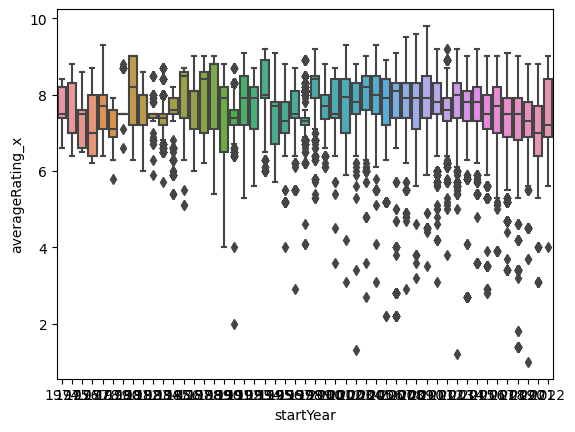

In [ ]:
ax = sns.boxplot(y="averageRating_x", x="startYear", data=filtered_tvseries_episodes_ratings)

# LEFTOVER / DUPLICATE CODE

merge data frames, do some grouping and sorting, create z score column

"But as you merge the two datasets, you’ll see that the number of titles did not decreased after merge. This implied that all the titles included in title.ratings are actually a subset of the titles in title.basics; this is good news as it means that all titles with ratings have basic information in place"

In [ ]:
#groupby

grouped_shows = filtered_tvseries_episodes_ratings.groupby('primaryTitle').count()
grouped_shows.head(20)

In [ ]:
grouped_shows_episodes = filtered_tvseries_episodes_ratings.sort_values(by='episodeNumber',ascending=False).groupby(['primaryTitle', 'tconst_y', 'seasonNumber'])
grouped_shows_episodes.first()

In [ ]:
#merge datasets
merged_data = pd.merge(csv_basics, csv_ratings, on ="tconst")

merged_data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1976
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.8,264
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1824
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",5.6,178
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2617


In [ ]:
#merge datasets again
merged_data_2 = pd.merge(merged_data, csv_episodes, on ="tconst")

merged_data_2.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tvEpisode,The Tenderfeet,The Tenderfeet,0,1949,\N,30,Western,7.5,81,tt0041038,1,9
1,tt0043631,tvEpisode,The Life of King Henry V,The Life of King Henry V,0,1951,\N,133,Drama,6.8,11,tt0989125,2,16
2,tt0044093,tvEpisode,The Three Musketeers,The Three Musketeers,0,1950,\N,60,Drama,4.5,17,tt0959862,1,6
3,tt0045960,tvEpisode,King Lear,King Lear,0,1953,\N,75,"Drama,History,Music",6.8,184,tt0044284,2,3
4,tt0046150,tvEpisode,Othello,Othello,0,1953,\N,84,Drama,8.2,11,tt0341798,\N,\N


In [ ]:
merged_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 644252 entries, 0 to 644251
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          644252 non-null  object 
 1   titleType       644252 non-null  object 
 2   primaryTitle    644252 non-null  object 
 3   originalTitle   644252 non-null  object 
 4   isAdult         644252 non-null  object 
 5   startYear       644252 non-null  object 
 6   endYear         644252 non-null  object 
 7   runtimeMinutes  644252 non-null  object 
 8   genres          644250 non-null  object 
 9   averageRating   644252 non-null  float64
 10  numVotes        644252 non-null  int64  
 11  parentTconst    644252 non-null  object 
 12  seasonNumber    644252 non-null  object 
 13  episodeNumber   644252 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 73.7+ MB


In [ ]:
merged_data_2['startYear'] = merged_data_2['startYear'].astype(int64)

ValueError: ignored

In [ ]:
merged_data_2['startYear'] = pd.to_numeric(merged_data_2['startYear'], errors='coerce').astype(pd.Int64Dtype())


In [ ]:
filtered_tv_shows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134426 entries, 3 to 644225
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          134426 non-null  object 
 1   titleType       134426 non-null  object 
 2   primaryTitle    134426 non-null  object 
 3   originalTitle   134426 non-null  object 
 4   isAdult         134426 non-null  object 
 5   startYear       134414 non-null  Int64  
 6   endYear         134426 non-null  object 
 7   runtimeMinutes  134426 non-null  object 
 8   genres          134426 non-null  object 
 9   averageRating   134426 non-null  float64
 10  numVotes        134426 non-null  int64  
 11  parentTconst    134426 non-null  object 
 12  seasonNumber    134426 non-null  object 
 13  episodeNumber   134426 non-null  object 
dtypes: Int64(1), float64(1), int64(1), object(11)
memory usage: 15.5+ MB


In [ ]:
#https://www.youtube.com/watch?v=9dBUOxeyONc

#creating multiple filtering conditions

numvotescondition = merged_data_2['numVotes'] > 100
startYearcondition = merged_data_2['startYear'] > 1973
genrecondition = merged_data_2["titleType"] == 'tvEpisode'

#create conditions for 'seasons' that would look at number of total seasons/epiosdes...

filtered_tv_shows = merged_data_2[numvotescondition & genrecondition & startYearcondition]

filtered_tv_shows.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,parentTconst,seasonNumber,episodeNumber
397,tt0070480,tvEpisode,One Deadly Owner,One Deadly Owner,0,1974,\N,70,"Crime,Drama,Fantasy",6.8,207,tt0164295,2,4
419,tt0071195,tvEpisode,The Barbary Coast,The Barbary Coast,0,1975,\N,100,Western,6.4,112,tt0072470,1,0
425,tt0071343,tvEpisode,Color Him Dead,K Is for Killing,0,1974,\N,63,"Crime,Drama,Fantasy",5.6,168,tt0164295,2,6
426,tt0071345,tvEpisode,A Friend in Deed,A Friend in Deed,0,1974,\N,98,"Crime,Drama,Mystery",8.1,2601,tt1466074,3,8
427,tt0071346,tvEpisode,By Dawn's Early Light,By Dawn's Early Light,0,1974,\N,98,"Crime,Drama,Mystery",7.8,2643,tt1466074,4,3


**Calculate Z score**

 Z-scores measure how much a value deviates from the mean in terms of standard deviations.

 Z-Score is essentially how many standard deviations away is my actual value from the mean value

In [ ]:

#calculaiting z score

filtered_tv_shows['episode_z_score'] = stats.zscore(filtered_tv_shows['averageRating'])
filtered_tv_shows.head()

<ipython-input-34-26aba4330763>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tv_shows['episode_z_score'] = stats.zscore(filtered_tv_shows['averageRating'])


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,parentTconst,seasonNumber,episodeNumber,z_score,episode_z_score
397,tt0070480,tvEpisode,One Deadly Owner,One Deadly Owner,0,1974,\N,70,"Crime,Drama,Fantasy",6.8,207,tt0164295,2,4,-1.075353,-1.075353
419,tt0071195,tvEpisode,The Barbary Coast,The Barbary Coast,0,1975,\N,100,Western,6.4,112,tt0072470,1,0,-1.563323,-1.563323
425,tt0071343,tvEpisode,Color Him Dead,K Is for Killing,0,1974,\N,63,"Crime,Drama,Fantasy",5.6,168,tt0164295,2,6,-2.539265,-2.539265
426,tt0071345,tvEpisode,A Friend in Deed,A Friend in Deed,0,1974,\N,98,"Crime,Drama,Mystery",8.1,2601,tt1466074,3,8,0.510553,0.510553
427,tt0071346,tvEpisode,By Dawn's Early Light,By Dawn's Early Light,0,1974,\N,98,"Crime,Drama,Mystery",7.8,2643,tt1466074,4,3,0.144574,0.144574


so that episode z score shows how many standard deviations above/below  the mean

question, is the above z score calculating based on the entire mean of the dataset, which would be incorrect, or by the mean of the tv show, which would be more accurate...

might be interesting to look at the shows with the highest mean average rating, could be a good way to get 'top 100' (by avreage rating if we wanna go that route...

**group by parentTconst**